# Image Compression using PCA

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

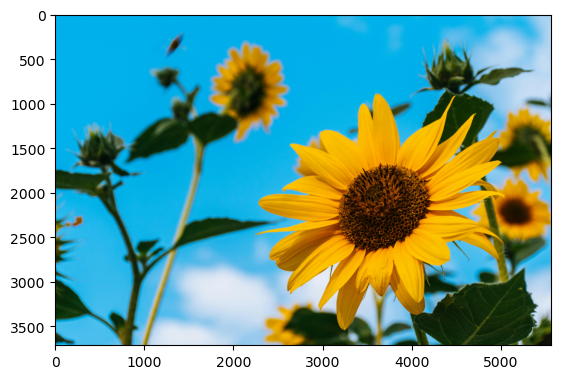

In [11]:
img = cv2.imread('../imgs/flower.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

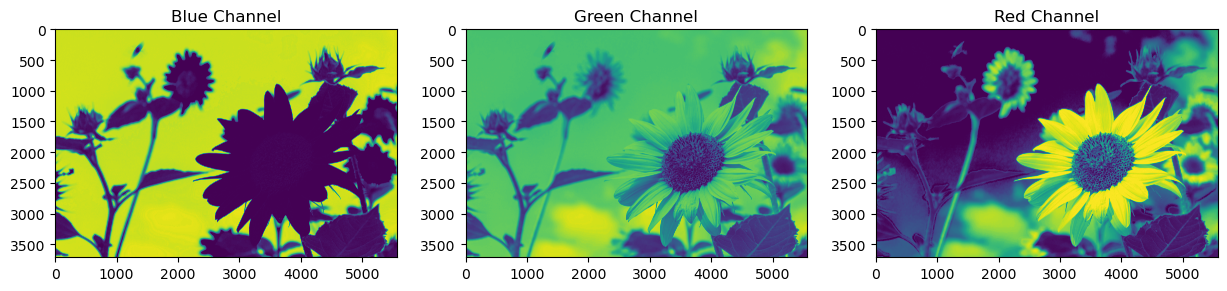

In [12]:
# Split 3 channels
blue, green, red = cv2.split(img)   # split a multi-channel array into separate single-channel arrays.

# Plot each channel
fig = plt.figure(figsize=(15, 8))

fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [14]:
def compress_img(b, g, r, n):
    """
    b: blue channel
    g: green channel
    r: red channel
    n: number of components
    """
    pca_b = PCA(n_components=n)
    compressed_b = pca_b.fit_transform(b)
    
    pca_g = PCA(n_components=n)
    compressed_g = pca_g.fit_transform(g)
    
    pca_r = PCA(n_components=n)
    compressed_r = pca_r.fit_transform(r)

    return pca_b, pca_g, pca_r, compressed_b, compressed_g, compressed_r

In [15]:
# Normalize
blue = blue / 255
green = green / 255
red = red / 255

# PCA
N = 100
pca_b, pca_g, pca_r, compressed_b, compressed_g, compressed_r = compress_img(blue, green, red, N)

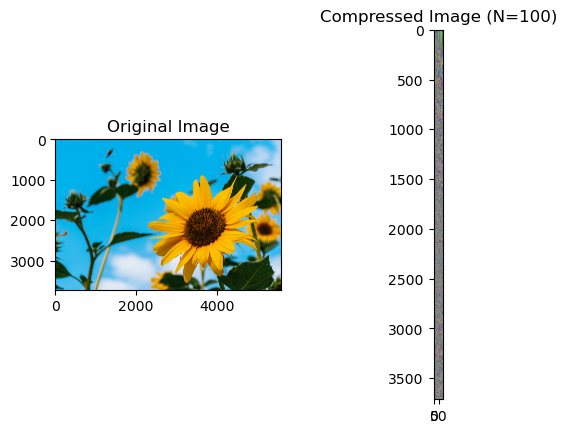

In [17]:
compressed_imgT = cv2.merge((compressed_b, compressed_g, compressed_r))
compressed_imgT = (compressed_imgT * 255).astype(np.uint8)  # Convert to uint8 to support opencv

plt.figure()
plt.subplot(1, 2, 1)

plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)

plt.title("Compressed Image (N=100)")
plt.imshow(cv2.cvtColor(compressed_imgT, cv2.COLOR_BGR2RGB))
plt.show()

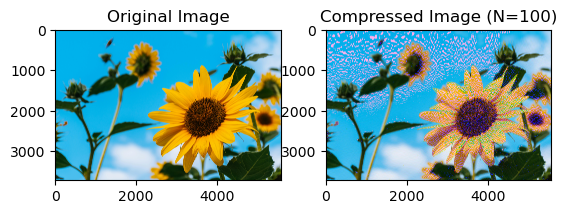

In [16]:
# Reconstruct image
recon_b = pca_b.inverse_transform(compressed_b)
recon_g = pca_g.inverse_transform(compressed_g)
recon_r = pca_r.inverse_transform(compressed_r)

# Combine 3 channels
compressed_img = cv2.merge((recon_b, recon_g, recon_r))
compressed_img = (compressed_img * 255).astype(np.uint8)  # Convert to uint8 to support opencv


# Show comparison of original and compressed image
plt.figure()
plt.subplot(1, 2, 1)

plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)

plt.title("Compressed Image (N=100)")
plt.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
plt.show()

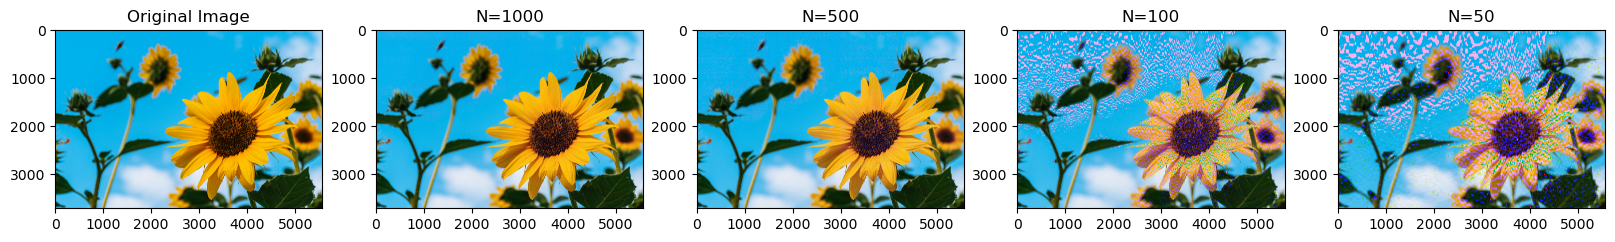

In [23]:

n_components = [1000, 500, 100, 50]

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for i, n in enumerate(n_components):
    pca_b, pca_g, pca_r, compressed_b, compressed_g, compressed_r = compress_img(blue, green, red, n)
    recon_b = pca_b.inverse_transform(compressed_b)
    recon_g = pca_g.inverse_transform(compressed_g)
    recon_r = pca_r.inverse_transform(compressed_r)
    compressed_img = cv2.merge((recon_b, recon_g, recon_r))
    compressed_img = (compressed_img * 255).astype(np.uint8)
    fig.add_subplot(1, 5, i+2)
    plt.title("N={}".format(n))
    plt.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
plt.show()